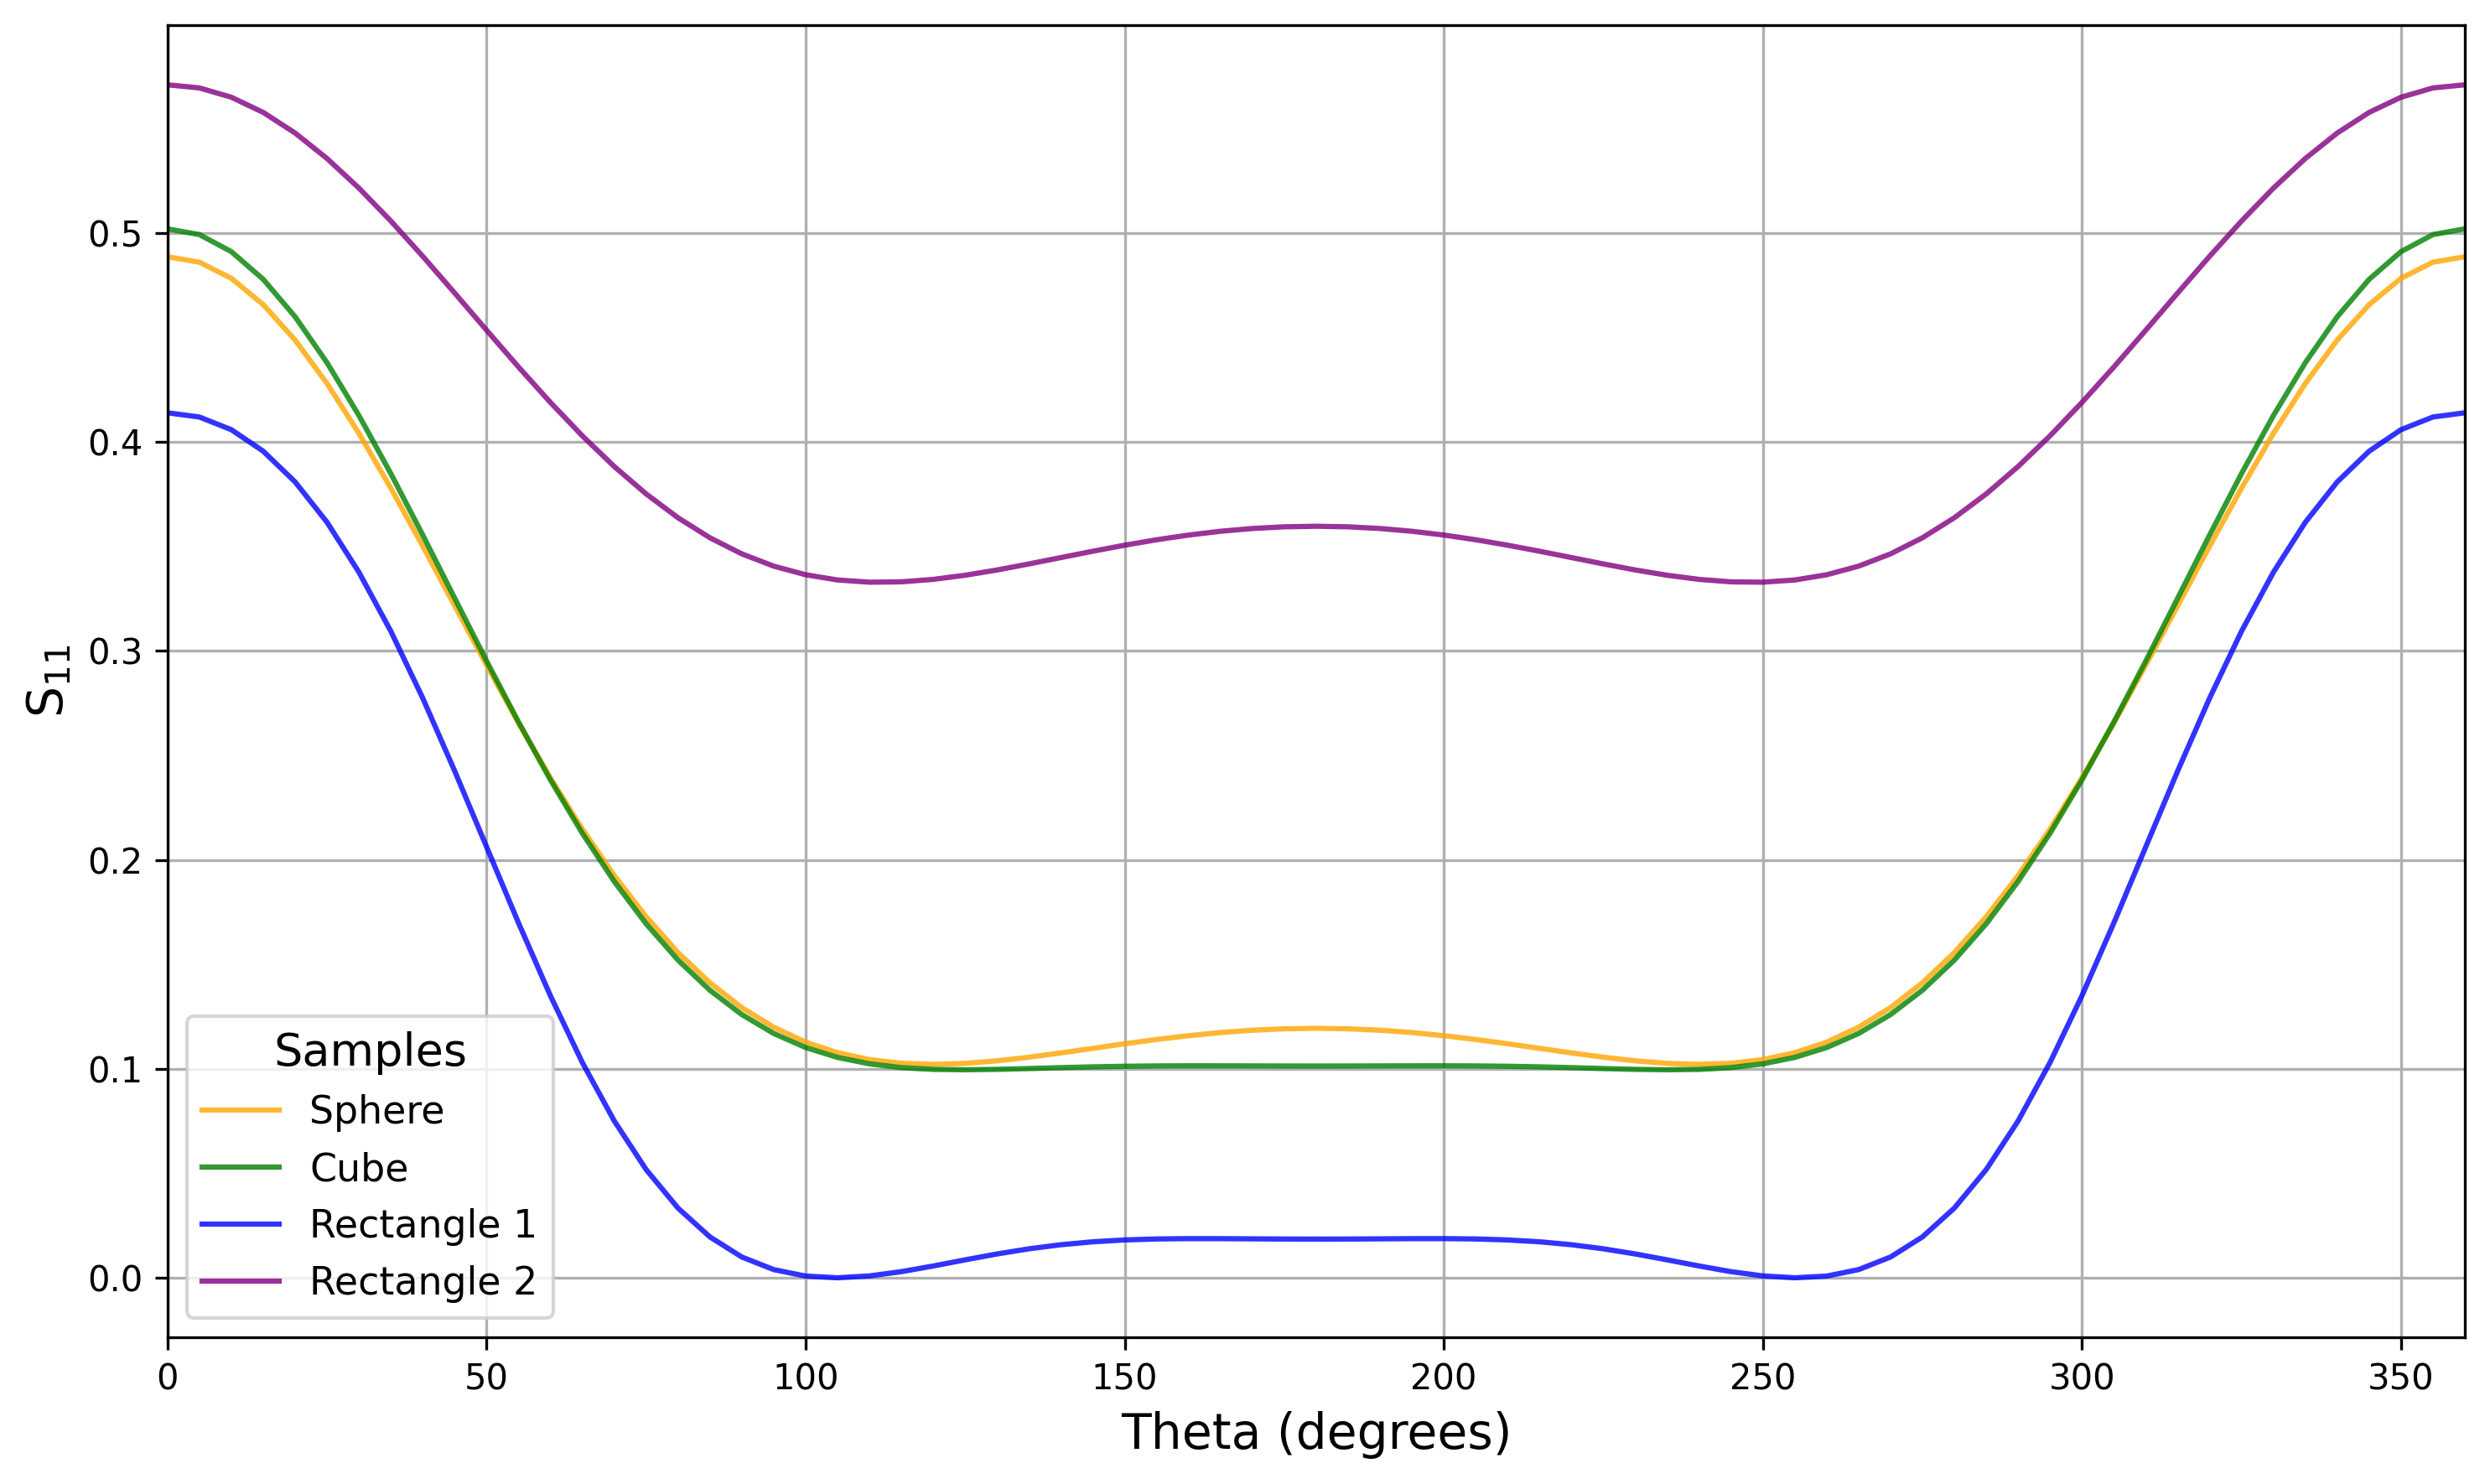

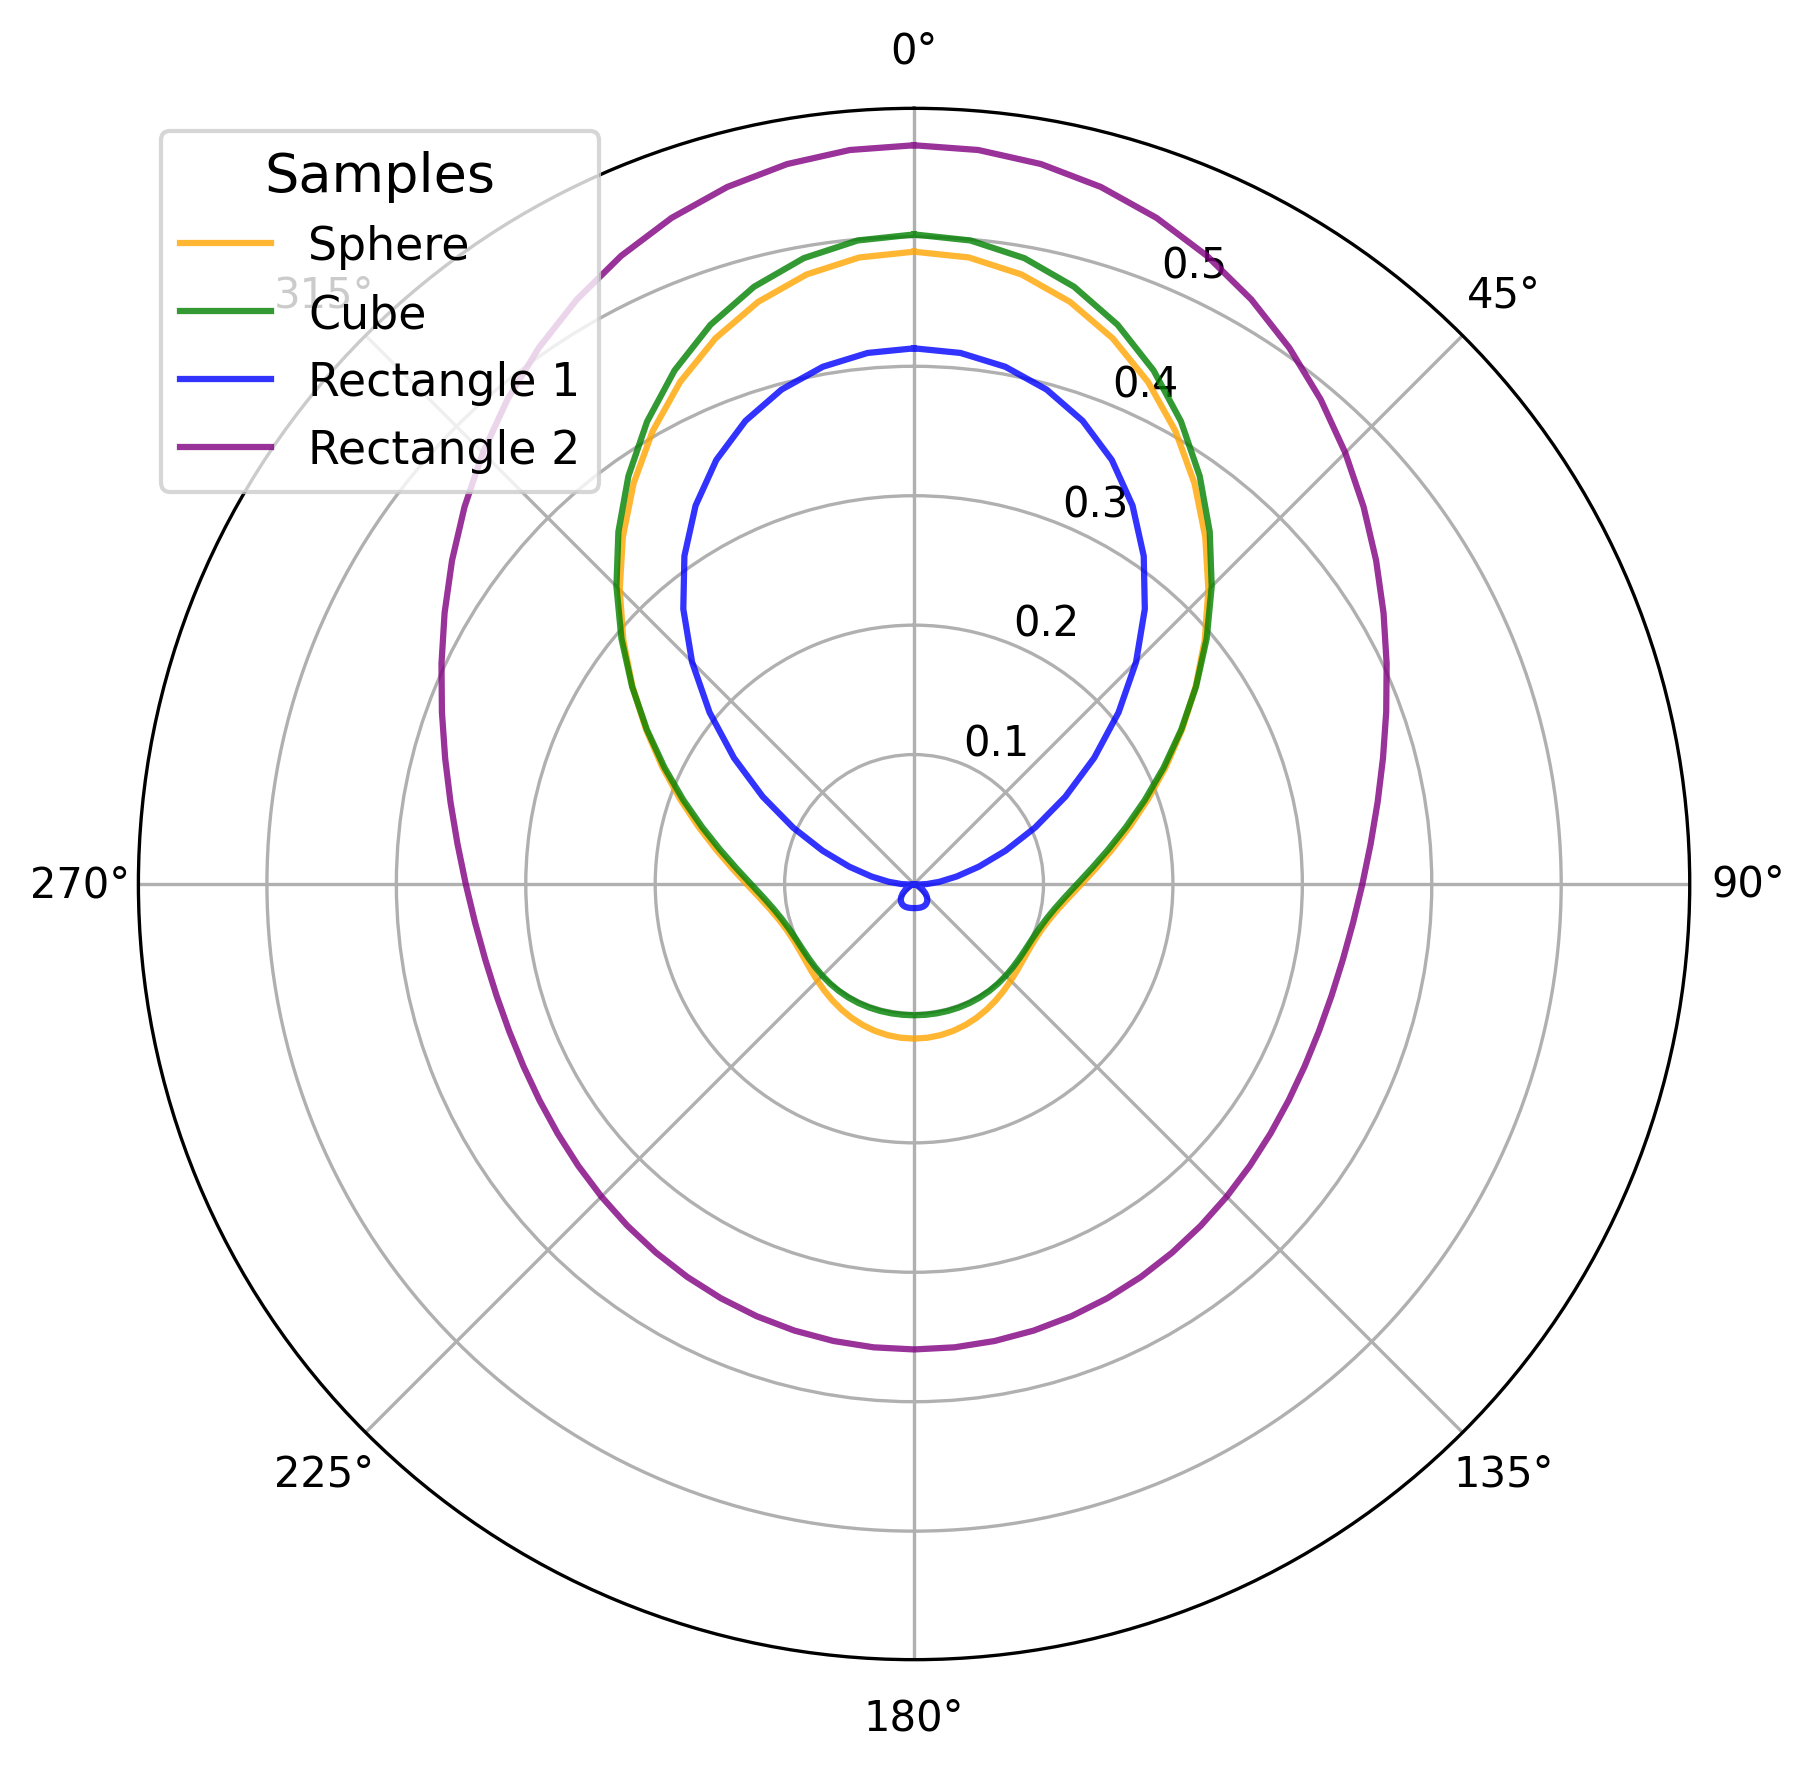

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def extract_data(file_path):
    """
    Extracts data from the given file path.
    Parameters:
    - file_path: Path to the file from which to extract data.
    Returns:
    - DataFrame containing extracted data.
    """
    data_start_marker = "theta    phi    Pol.    S_11        S_12        S_21       S_22       S_31       S_41"
    extracted_data = []
    with open(file_path, 'r') as file:
        data_section_started = False
        for line in file:
            if data_start_marker in line:
                data_section_started = True
                continue
            if data_section_started and line.strip() == "":
                break
            if data_section_started:
                parts = line.split()
                data_row = {col: parts[idx] for idx, col in enumerate(columns_of_interest)}
                extracted_data.append(data_row)
    df = pd.DataFrame(extracted_data)
    return df.astype(float)

# Define the columns of interest
columns_of_interest = ['theta', 'phi', 'Pol.', 'S_11', 'S_12', 'S_21', 'S_22', 'S_31', 'S_41']

# Paths to the files
file1_path = '/Users/beatrizmassanz/Documents/GitHub/light-refraction-lunar-dust/DDA/examples_exp/0_SPHERE/w000r000.avg'
file2_path = '/Users/beatrizmassanz/Documents/GitHub/light-refraction-lunar-dust/DDA/examples_exp/0_CUBE/w000r000.avg' 
file3_path = '/Users/beatrizmassanz/Documents/GitHub/light-refraction-lunar-dust/DDA/examples_exp/0_RECTANGLE1/w000r000.avg' 
file4_path = '/Users/beatrizmassanz/Documents/GitHub/light-refraction-lunar-dust/DDA/examples_exp/0_RECTANGLE2/w000r000.avg' 

# Extract data from the files
df1 = extract_data(file1_path)
df2 = extract_data(file2_path)
df3 = extract_data(file3_path)
df4 = extract_data(file4_path)

# List of DataFrames and labels for plotting
data_frames = [df1, df2, df3, df4]
labels = ['Sphere', 'Cube', 'Rectangle 1', 'Rectangle 2']
colors = ['orange', 'green', 'blue', 'purple']  # Different colors for each line

def plot_data_cartesian(data_frames, labels, colors):
    """
    Plots the data in Cartesian coordinates.
    Parameters:
    - data_frames: List of DataFrames containing the data.
    - labels: List of labels for each dataset.
    - colors: List of colors for each dataset.
    """
    plt.figure(figsize=(10, 6), dpi=300)  # High DPI for better quality
    
    for df, label, color in zip(data_frames, labels, colors):
        plt.plot(df[df["phi"] == 0]["theta"], 
                 df[df["phi"] == 0]["S_11"], 
                 label=label, color=color, alpha=0.8, linestyle='-', linewidth=1.5)
    
    plt.xlabel('Theta (degrees)', fontsize=14)
    plt.ylabel(r'S$_{11}$', fontsize=14)
    plt.legend(title="Samples", fontsize=11, title_fontsize=13)
    plt.xlim(0, 360)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_data_polar(data_frames, labels, colors):
    """
    Plots the data in Polar coordinates.
    Parameters:
    - data_frames: List of DataFrames containing the data.
    - labels: List of labels for each dataset.
    - colors: List of colors for each dataset.
    """
    plt.figure(figsize=(8, 6), dpi=300)  # High DPI for better quality
    ax = plt.subplot(111, projection='polar')

    for df, label, color in zip(data_frames, labels, colors):
        theta_radians = np.radians(df[df["phi"] == 0]["theta"].astype(float))
        s_11_values = df[df["phi"] == 0]["S_11"].astype(float)
        ax.plot(theta_radians, s_11_values, label=label, color=color, alpha=0.8, linestyle='-', linewidth=1.5)
    
    ax.set_theta_direction(-1)
    ax.set_theta_zero_location('N')
    plt.legend(title="Samples", loc='upper left', fontsize=11, title_fontsize=13)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot Cartesian and Polar Data
plot_data_cartesian(data_frames, labels, colors)
plot_data_polar(data_frames, labels, colors)